In [159]:
import numpy as np
import os, glob, sys
import time, datetime, calendar
import pytz
import xarray as xr
import matplotlib.pyplot as plt

In [117]:
startdate = '20181015.0000'
enddate = '20190303.0000'

# Maximum time difference allowed to match the datasets
time_window = 40  # [second]

# Input/output file locations
# stats_path = os.path.expandvars('$ICLASS') + f'/cacti/radar_processing/taranis_corcsapr2cfrppiqcM1_celltracking.c1/stats/'
stats_path = f'/lustre/or-hydra/cades-arm/proj-shared/iclass/cacti/radar_processing/taranis_corcsapr2cfrppiqcM1_mpgridded_celltracking.c1/stats/'
sonde_path = f'/lustre/or-hydra/cades-arm/proj-shared/iclass/cacti/sounding_stats/'
output_path = stats_path

In [5]:
stats_path

'/lustre/or-hydra/cades-arm/proj-shared/iclass/cacti/radar_processing/taranis_corcsapr2cfrppiqcM1_mpgridded_celltracking.c1/stats/'

In [6]:
# Input file basenames
stats_filebase = 'stats_tracknumbersv1.0_'

# Output statistics filename
output_filename = f'{output_path}interpsonde_celltrack_{startdate}_{enddate}.nc'

# Track statistics file dimension names
trackdimname = 'tracks'
timedimname = 'times'
relative_time_dimname = 'reltime'

# Track statistics file
trackstats_file = f'{stats_path}{stats_filebase}{startdate}_{enddate}.nc'
muparcel_file = f'{sonde_path}Interpsonde_parameters_CACTI_AMF.nc'
# uvq_file = f'{sonde_path}CACTI_M1_interpsonde_wind_humidity_indices.nc'

In [7]:
# Read track statistics file
print(trackstats_file)
dsstats = xr.open_dataset(trackstats_file, decode_times=False)
ntracks = dsstats.dims[trackdimname]
# ntimes = dsstats.dims[timedimname]
stats_basetime = dsstats['basetime']
basetime_units = dsstats['basetime'].units
# cell_area = dsstats['cell_area'].values
# pixel_radius = dsstats.attrs['pixel_radius_km']
# Get cell initiation time
stats_basetime0 = stats_basetime.sel(times=0).data
dsstats.close()

print(f'Total Number of Tracks: {ntracks}')

/lustre/or-hydra/cades-arm/proj-shared/iclass/cacti/radar_processing/taranis_corcsapr2cfrppiqcM1_mpgridded_celltracking.c1/stats/stats_tracknumbersv1.0_20181015.0000_20190303.0000.nc
Total Number of Tracks: 6469


In [92]:
# Read sonde MU parcel file
dsmup = xr.open_dataset(muparcel_file, decode_times=False)
sonde_basetime = dsmup.time.values
dsmup

<xarray.Dataset>
Dimensions:                      (len: 6, time: 18624)
Coordinates:
  * time                         (time) float64 1.539e+09 ... 1.557e+09
Dimensions without coordinates: len
Data variables:
    yyyymmdd                     (time) float64 ...
    hhmmss                       (len, time) |S1 ...
    tallenough_sfc               (time) float64 ...
    CAPE_sfc                     (time) float64 ...
    CIN_NA_sfc                   (time) float64 ...
    CIN_NA_fract_sfc             (time) float64 ...
    CIN_IB_sfc                   (time) float64 ...
    LFC_height_sfc               (time) float64 ...
    LCL_height_sfc               (time) float64 ...
    EL_height_sfc                (time) float64 ...
    CAPEacbl_IB_sfc              (time) float64 ...
    CAPElcl_IB_sfc               (time) float64 ...
    tallenough_mu                (time) float64 ...
    CAPE_mu                      (time) float64 ...
    CIN_NA_mu                    (time) float64 ...
    CIN_NA_fract_mu              (time) float64 ...
    CIN_IB_mu                    (time) float64 ...
    LFC_height_mu                (time) float64 ...
    dZstar_mu                    (time) float64 ...
    LCL_height_mu                (time) float64 ...
    EL_height_mu                 (time) float64 ...
    CAPEacbl_IB_mu               (time) float64 ...
    CAPElcl_IB_mu                (time) float64 ...
    CAPE_L01_mu                  (time) float64 ...
    CAPE_L12_mu                  (time) float64 ...
    CAPE_L23_mu                  (time) float64 ...
    CAPE_L34_mu                  (time) float64 ...
    initial_ht_parcel_mu         (time) float64 ...
    U_mu                         (time) float64 ...
    V_mu                         (time) float64 ...
    rvap_mu                      (time) float64 ...
    theta_mu                     (time) float64 ...
    thetav_mu                    (time) float64 ...
    tallenough_ml                (time) float64 ...
    CAPE_ml                      (time) float64 ...
    CIN_NA_ml                    (time) float64 ...
    CIN_NA_fract_ml              (time) float64 ...
    CIN_IB_ml                    (time) float64 ...
    LFC_height_ml                (time) float64 ...
    LCL_height_ml                (time) float64 ...
    EL_height_ml                 (time) float64 ...
    CAPEacbl_IB_ml               (time) float64 ...
    CAPElcl_IB_ml                (time) float64 ...
    BL_type                      (time) float64 ...
    BLtop_height_LiuLiang        (time) float64 ...
    RH_BLmean                    (time) float64 ...
    DD_BLmean                    (time) float64 ...
    rvap_mean_BL                 (time) float64 ...
    rvapGrad_mean_BL             (time) float64 ...
    theta_mean_BL                (time) float64 ...
    shear_bulk_BL                (time) float64 ...
    shear_mag_mean_BL            (time) float64 ...
    EIL10_bot_height             (time) float64 ...
    EIL10_top_height             (time) float64 ...
    EIL25_bot_height             (time) float64 ...
    EIL25_top_height             (time) float64 ...
    EIL50_bot_height             (time) float64 ...
    EIL50_top_height             (time) float64 ...
    EIL100_bot_height            (time) float64 ...
    EIL100_top_height            (time) float64 ...
    EIL250_bot_height            (time) float64 ...
    EIL250_top_height            (time) float64 ...
    U_mean_EIL10                 (time) float64 ...
    V_mean_EIL10                 (time) float64 ...
    Ucrel_mean_EIL10             (time) float64 ...
    Vcrel_mean_EIL10             (time) float64 ...
    rvap_mean_EIL10              (time) float64 ...
    RH_mean_EIL10                (time) float64 ...
    U_mean_EIL25                 (time) float64 ...
    V_mean_EIL25                 (time) float64 ...
    Ucrel_mean_EIL25             (time) float64 ...
    Vcrel_mean_EIL25             (time) float64 ...
    rvap_mean_EIL25              (time) float6

In [142]:
sonde_var_names = list(dsmup.data_vars.keys())

In [143]:
sonde_var_names[1]

'hhmmss'

In [144]:
print(sonde_var_names[0])
dsmup[sonde_var_names[0]].values

yyyymmdd


array([20181014., 20181014., 20181014., ..., 20190430., 20190430.,
       20190430.])

In [145]:
print(sonde_var_names[1])
dsmup[sonde_var_names[1]].values

hhmmss


array([[b'0', b'0', b'0', ..., b'2', b'2', b'2'],
       [b'0', b'0', b'0', ..., b'3', b'3', b'3'],
       [b'0', b'1', b'3', ..., b'1', b'3', b'4'],
       [b'0', b'5', b'0', ..., b'5', b'0', b'5'],
       [b'3', b'3', b'3', ..., b'2', b'2', b'2'],
       [b'0', b'0', b'0', ..., b'9', b'9', b'9']], dtype='|S1')

In [146]:
# "".join(chartostring(cloudidfiles))

In [147]:
sonde_var_names.remove('yyyymmdd')
sonde_var_names.remove('hhmmss')

In [148]:
# Number of relative sonde time to track initiation (-3, -2, -1, 0 hour)
nreltime = 4
# sonde_matchtime = np.full((ntracks,nreltime), dtype=float, fill_value=np.nan)

out_vars = {}
nvars = len(sonde_var_names)
for ivar in sonde_var_names:
#     print(ivar)
    out_vars[ivar] = np.full((ntracks, nreltime), dtype=float, fill_value=np.nan)

# out_vars['time'] = np.full((ntracks, nreltime), dtype=float, fill_value=np.nan)

In [149]:
# # Remove variables in the dictionary
# out_vars.pop('yyyymmdd', 'No key found')
# out_vars.pop('hhmmss', 'No key found')

In [150]:
out_vars['time']

array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       ...,
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]])

In [164]:
# Loop over each cell track to find match sonde time
for tt in range(0, ntracks):

    # Tracks at initiation time
    matchindex = np.where(np.abs(sonde_basetime - stats_basetime0[tt]) < time_window)[0]
    # Initiation time -1, -2, -3 hour 
    matchindex_1h = np.where(np.abs(sonde_basetime - (stats_basetime0[tt] - 3600*1)) < time_window)[0]
    matchindex_2h = np.where(np.abs(sonde_basetime - (stats_basetime0[tt] - 3600*2)) < time_window)[0]
    matchindex_3h = np.where(np.abs(sonde_basetime - (stats_basetime0[tt] - 3600*3)) < time_window)[0]
    if (len(matchindex) == 1) & (len(matchindex_1h) == 1) & \
        (len(matchindex_2h) == 1) & (len(matchindex_3h) == 1):
#         print(f'Track #: {tt}')
    
        # Loop over each variable in the list
        for ivar in sonde_var_names:
#         for ivar in sonde_var_names[0:2]:
            out_vars[ivar][tt,0] = dsmup[ivar].values[matchindex]
            out_vars[ivar][tt,1] = dsmup[ivar].values[matchindex_1h]
            out_vars[ivar][tt,2] = dsmup[ivar].values[matchindex_2h]
            out_vars[ivar][tt,3] = dsmup[ivar].values[matchindex_3h]
            
    else:
        print(f'No match sonde time found: {stats_basetime0[tt]}')

No match sonde time found: 1541531880.0
No match sonde time found: 1541531880.0
No match sonde time found: 1541531880.0
No match sonde time found: 1541531880.0
No match sonde time found: 1541531880.0


In [154]:
sonde_var_names[0:2]

['tallenough_sfc', 'CAPE_sfc']

(array([1768.,  727.,  425.,  323.,  351.,  209.,   85.,   89.,   71.,
          37.,   83.,  119.,   56.,   29.,   23.,   23.,   14.,   21.,
          10.,    7.,   11.,   17.,   15.,    9.,    5.,    0.,    0.,
           0.,    0.,    2.,    0.,    0.,    0.,    2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000,
        2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200,
        4400, 4600, 4800, 5000, 5200, 5400, 5600, 5800, 6000, 6200, 6400,
        6600, 6800]),
 <a list of 34 Patch objects>)

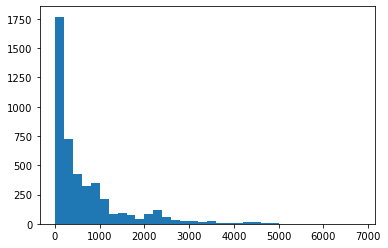

In [163]:
plt.hist(out_vars['CAPE_sfc'][:,0], bins=np.arange(0,7000,200))

In [109]:
stats_basetime0[0:4]

array([1.5397218e+09, 1.5397227e+09, 1.5397254e+09, 1.5397371e+09])

In [116]:
np.where(np.abs(sonde_basetime - stats_basetime0[0]) < 35)[0]

array([274])

In [105]:
time_window

10

In [90]:
# sonde_vars['']

<xarray.Dataset>
Dimensions:  (time: 18624)
Coordinates:
  * time     (time) float64 1.539e+09 1.539e+09 ... 1.557e+09 1.557e+09
Data variables:
    *empty*